In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [57]:
df=pd.read_csv("globalterrorismdb_0718dist.csv")
df.head()

c:\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [17]:
df.shape

(181691, 135)

In [18]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df=df[['iyear','imonth','iday','country_txt','city','latitude','longitude','extended','target1','success','suicide',
       'attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','nwound']]

In [59]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded',
                   'targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended','latitude':'Latitude','longitude':'Longitude', 'target1': 'Target','city':'City'}, inplace = True)

In [9]:
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Extended,Target,success,suicide,AttackType,Target_Type,Weapon_type,Killed,Wounded
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,0,Julio Guzman,1,0,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,0,"Nadine Chaval, daughter",1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,0,Employee,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Greece,Athens,37.997490,23.762728,0,U.S. Embassy,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,33.580412,130.396361,0,U.S. Consulate,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN


# handling missing values

In [21]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
Latitude        4556
Longitude       4557
Extended           0
Target           636
success            0
suicide            0
AttackType         0
Target_Type        0
Weapon_type        0
Killed         10313
Wounded        16311
dtype: int64

In [60]:
df['Latitude']=df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude']=df['Longitude'].fillna(df['Longitude'].mean())
df['Killed'].fillna(df['Killed'].mode()[0],inplace=True)
df['Wounded'].fillna(df['Wounded'].mode()[0],inplace=True)
df['Target'].fillna(df['Target'].mode()[0],inplace=True)


In [61]:
df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
City           434
Latitude         0
Longitude        0
Extended         0
Target           0
success          0
suicide          0
AttackType       0
Target_Type      0
Weapon_type      0
Killed           0
Wounded          0
dtype: int64

# which year had the most attacks

<AxesSubplot:>

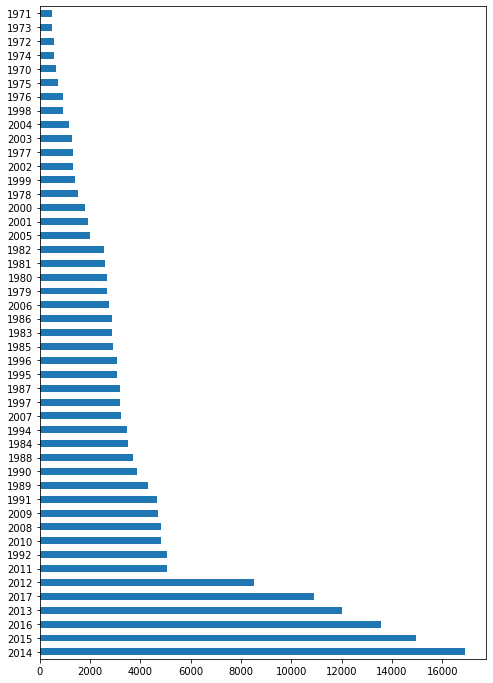

In [42]:

df['Year'].value_counts().plot(kind='barh', figsize=(8,12))


In recent years terrirorist attacks have increased.
highest in 2014

# most used weapon

<AxesSubplot:>

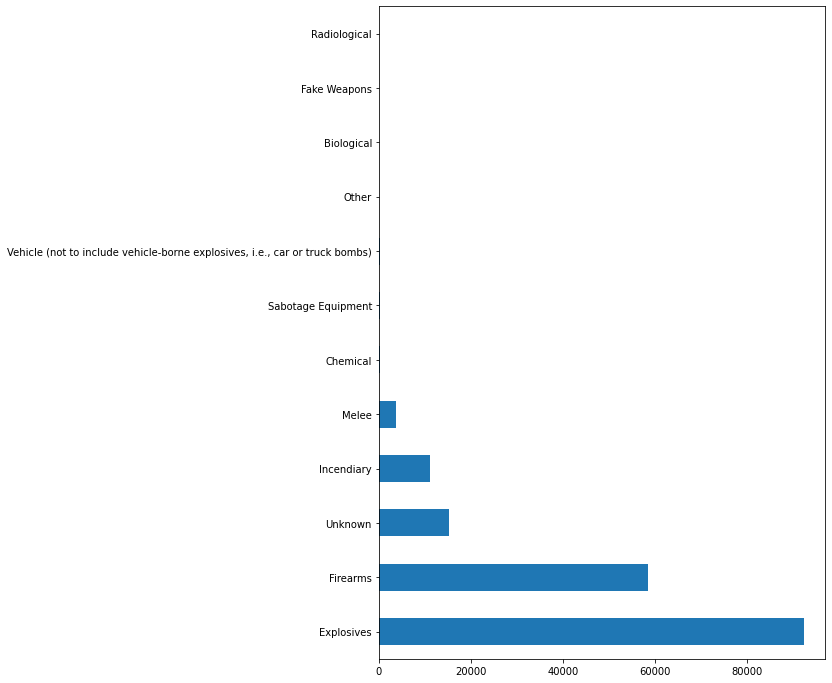

In [44]:
df['Weapon_type'].value_counts().plot(kind='barh', figsize=(8,12))


explosives have been used the most in attackking

# which country had most attacks

<AxesSubplot:>

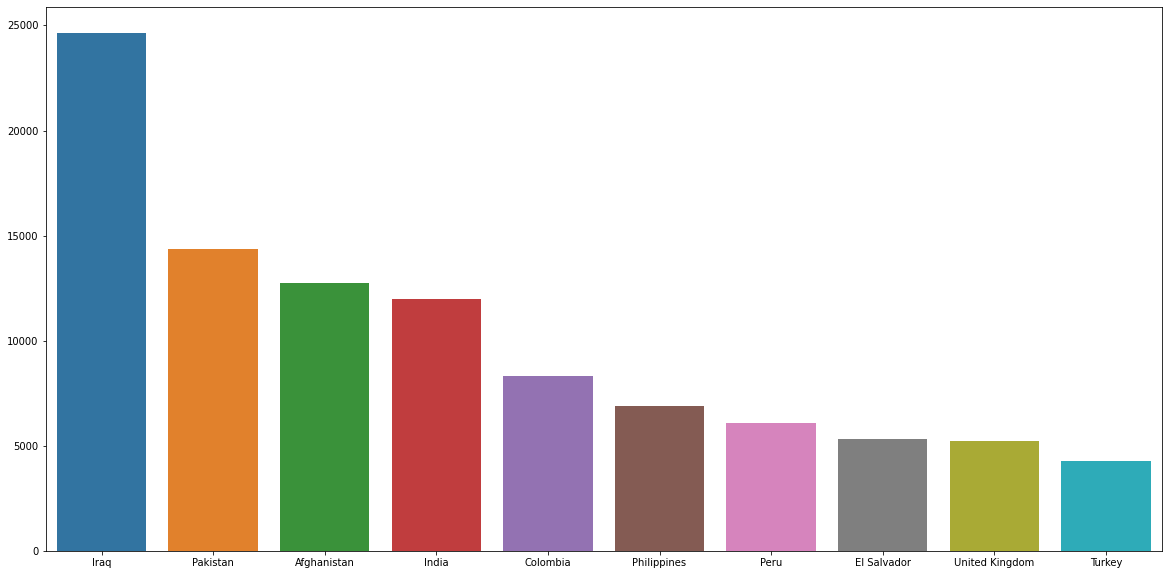

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Country'].value_counts()[:10].index,y=df['Country'].value_counts()[:10].values)

Iraq is the country with highest attacks

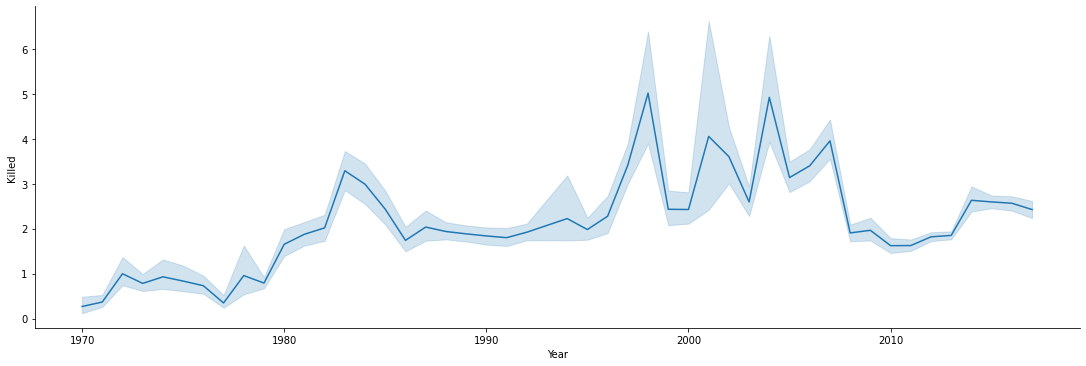

In [88]:
sns.relplot(x='Year',y='Killed',kind='line',data=df,height=5,aspect=3)


# which attack type caused most casualities

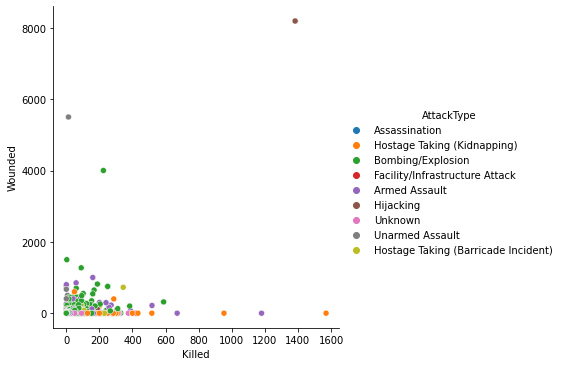

In [78]:
sns.relplot(x='Killed',y='Wounded',hue='AttackType',data=df)


most attacks resulted in less injuries however attacks that left most people wounded and killed were done in hijacking 

# which weapon type caused most casualities

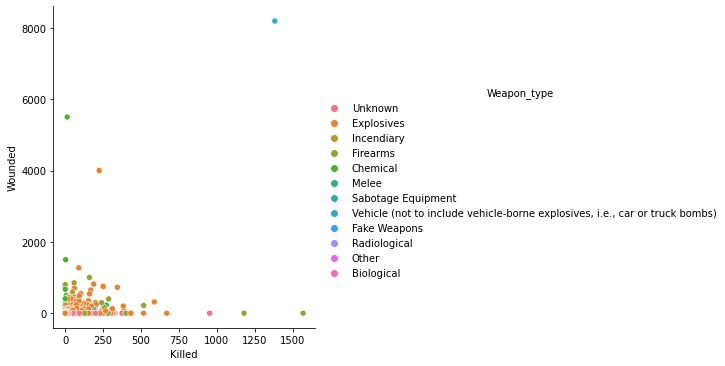

In [86]:
sns.relplot(x='Killed',y='Wounded',hue='Weapon_type',data=df)
plt.xlabel('Number of people killed')


weapon which killed most people were sabotage equipments and vehicles

# which city had most attacks

<AxesSubplot:>

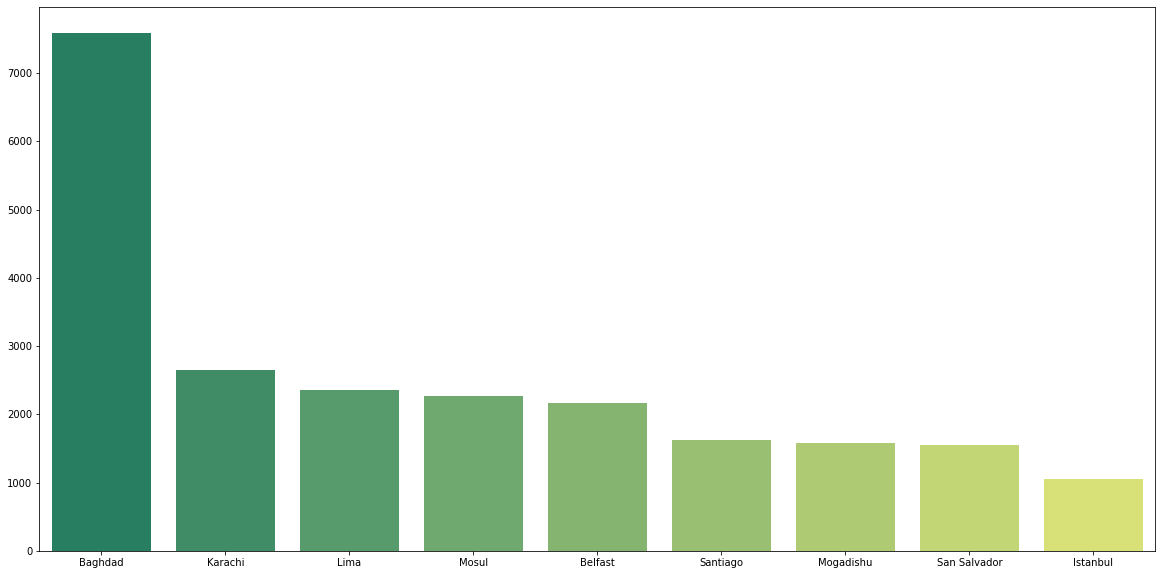

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['City'].value_counts()[1:10].index,y=df['City'].value_counts()[1:10].values,palette='summer')

baghbad is the city with most terrorist attacks

<AxesSubplot:xlabel='AttackType', ylabel='Killed'>

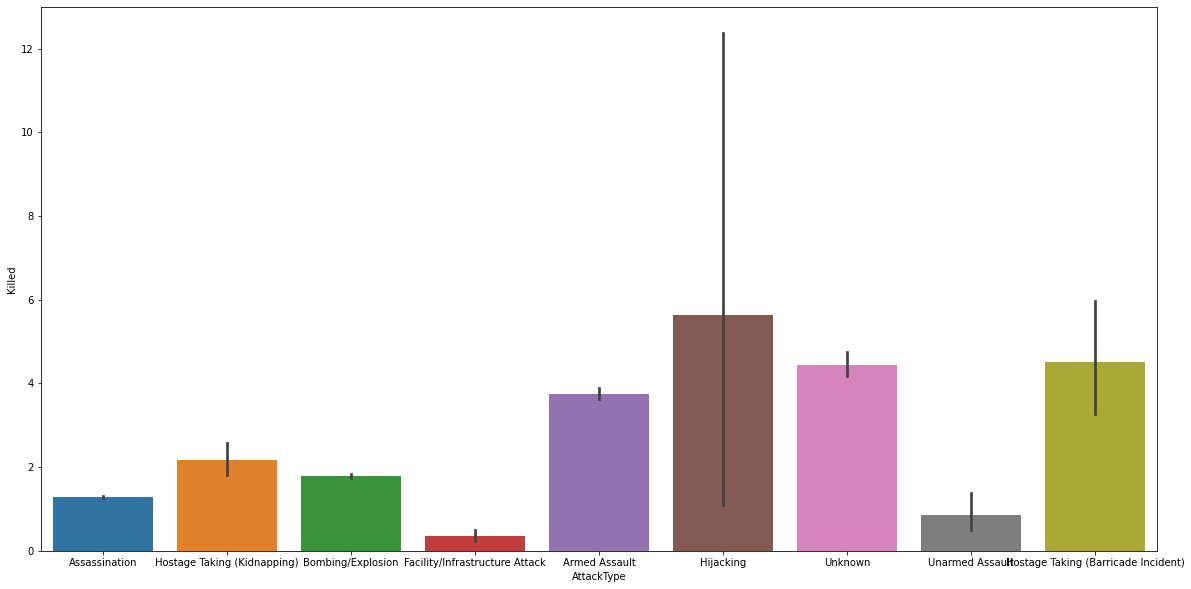

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['AttackType'],y=df['Killed'])

# most targetted type

<AxesSubplot:>

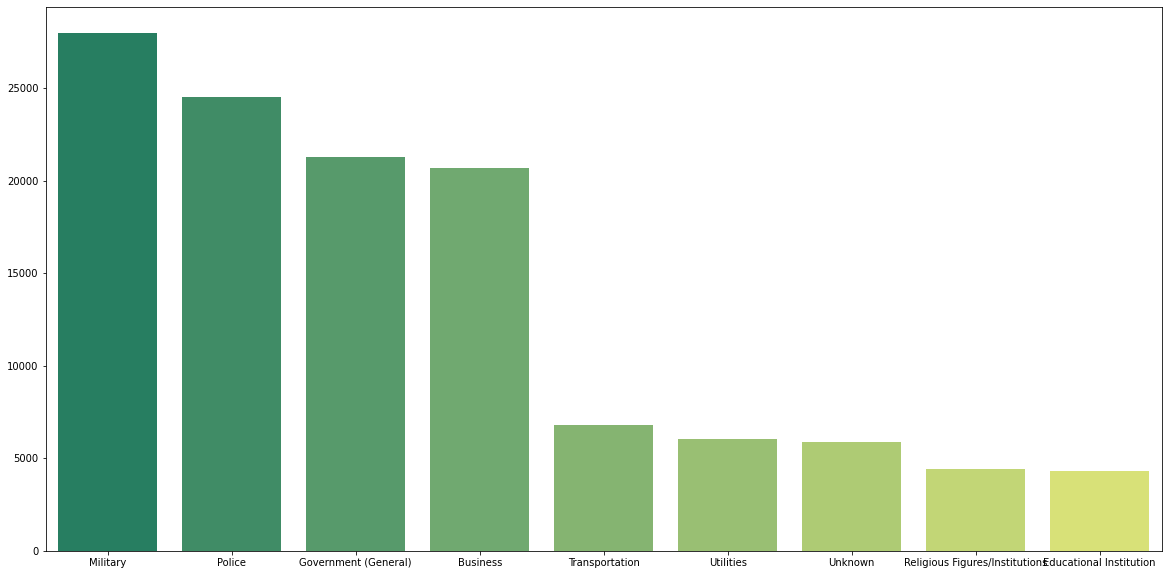

In [100]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Target_Type'].value_counts()[1:10].index,y=df['Target_Type'].value_counts()[1:10].values,palette='summer')

 military is the most targeted type 

In [144]:
typeKill = df.pivot_table(columns='Country', index="AttackType",values='Killed', aggfunc='sum')
typeKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
AttackType,,,,,,,,,,,,,,,,,,,,,
Armed Assault,13367.0,16.0,6372.0,0.0,1785.0,NaN,179.0,10.0,7.0,3.0,...,0.0,NaN,727.0,5.0,1.0,1735.0,65.0,122.0,47.0,66.0
Assassination,1558.0,10.0,556.0,NaN,36.0,NaN,85.0,5.0,3.0,7.0,...,1.0,NaN,270.0,46.0,NaN,524.0,17.0,2.0,7.0,48.0
Bombing/Explosion,16770.0,14.0,2645.0,NaN,401.0,NaN,203.0,16.0,6.0,13.0,...,0.0,NaN,347.0,36.0,0.0,4284.0,34.0,14.0,11.0,14.0
Facility/Infrastructure Attack,220.0,0.0,17.0,NaN,97.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,7.0,0.0,28.0,0.0,0.0,0.0,0.0
Hijacking,29.0,NaN,8.0,NaN,NaN,NaN,0.0,0.0,NaN,4.0,...,0.0,NaN,0.0,1.0,NaN,8.0,0.0,NaN,NaN,NaN
Hostage Taking (Barricade Incident),222.0,NaN,69.0,NaN,0.0,NaN,2.0,6.0,6.0,3.0,...,NaN,NaN,2.0,0.0,NaN,84.0,NaN,NaN,4.0,6.0
Hostage Taking (Kidnapping),2231.0,0.0,208.0,NaN,155.0,NaN,21.0,0.0,NaN,0.0,...,NaN,NaN,63.0,2.0,0.0,485.0,0.0,1.0,1.0,7.0
Unarmed Assault,33.0,0.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,...,0.0,NaN,55.0,0.0,NaN,0.0,NaN,NaN,NaN,7.0
Unknown,4954.0,2.0,1190.0,NaN,569.0,NaN,0.0,NaN,0.0,0.0,...,0.0,NaN,14.0,0.0,NaN,1628.0,3.0,185.0,NaN,6.0


In [132]:
yearkill = df.pivot_table(columns='Year', values=('Killed','Wounded',), aggfunc='sum')
yearkill

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Killed,174.0,173.0,566.0,370.0,539.0,617.0,674.0,456.0,1459.0,2100.0,...,9157.0,9273.0,7827.0,8246.0,15497.0,22273.0,44490.0,38853.0,34871.0,26445.0
Wounded,212.0,82.0,409.0,495.0,865.0,617.0,756.0,518.0,1600.0,2506.0,...,18998.0,19138.0,15947.0,14659.0,25445.0,37688.0,41128.0,44043.0,40001.0,24927.0


In [134]:
yearkill = df.pivot_table(columns='Target_Type', values=('Killed','Wounded',), aggfunc='sum')
yearkill

Target_Type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
Killed,10.0,3767.0,23487.0,3745.0,313.0,3039.0,26071.0,1501.0,1191.0,106047.0,...,53704.0,140504.0,13413.0,182.0,9088.0,758.0,13916.0,4329.0,1874.0,3617.0
Wounded,46.0,3478.0,54531.0,10227.0,234.0,10359.0,41184.0,1796.0,908.0,71038.0,...,64703.0,178672.0,24477.0,497.0,8223.0,1290.0,40679.0,3559.0,1353.0,5303.0


thank you